
                                                   Task 3 
                                 Mainflow services Services and Technologies Pvt ltd
                                
                                     DATA ANALYSIS AND DATA SCIENCE USING PYTHON


Task 3: Clustering Analysis– Customer Segmentation
Objective1.  Perform customer segmentation using clustering techniques to group customers based on their
 purchasing behavior, allowing businesses to target each segment effectively


 Project Steps
 Step 1: Dataset Selection
 ● Dataset Name: customer_data.csv
 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
url="https://raw.githubusercontent.com/renjinirv/customerdata/main/customer_data.csv"
try:
    data = pd.read_csv(url, on_bad_lines='skip')
    print(data)
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [4]:
data=pd.DataFrame(data)
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


Dataset includes Columns like:
 ○ CustomerID: Unique identifier for each customer.
 ○ Age:Age of the customer.
 ○ Annual Income: Income in $ (or any currency).
 ○ Spending Score: A score assigned to customers based on their spending
 patterns and behavior.

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [6]:
data.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


 Step 2: Tasks to Perform
 1. Load the Dataset
 ● Uselibraries such as Pandas to load the dataset into a DataFrame.
 ● Inspect the dataset by checking:
 ○ Shape, missing values, duplicates, and data types.
 ○ Summarystatistics to understand ranges of values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [8]:
data.size

16000

In [9]:
data.shape

(2000, 8)

In [10]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [11]:
data.describe(include="all")

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000


In [12]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [13]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
Categorical Columns: ['Gender', 'Profession']


In [14]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [15]:
print("\nNull values in each column:")
data.isnull().sum()


Null values in each column:


CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

### Profession column has 35 null values. Treat the null values with mode.

In [16]:
data['Profession'].fillna(data['Profession'].mode()[0],inplace=True)### filling the null values with the first mode value in the column

In [17]:
print("\nNull values in each column:")
data.isnull().sum()


Null values in each column:


CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

### Data visualisation

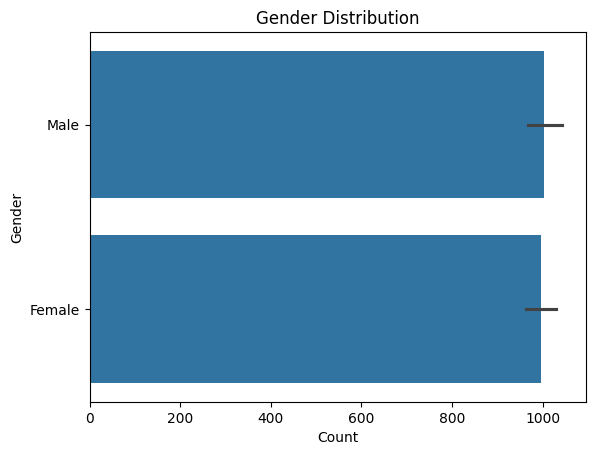

In [18]:
sns.barplot(x=data['Gender'].index, y=data['Gender'].values)
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

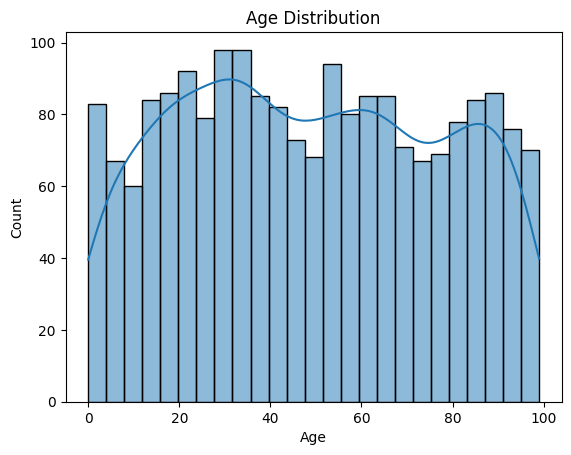

In [19]:
sns.histplot(data['Age'], kde=True, bins=25)
plt.title('Age Distribution')
plt.show()

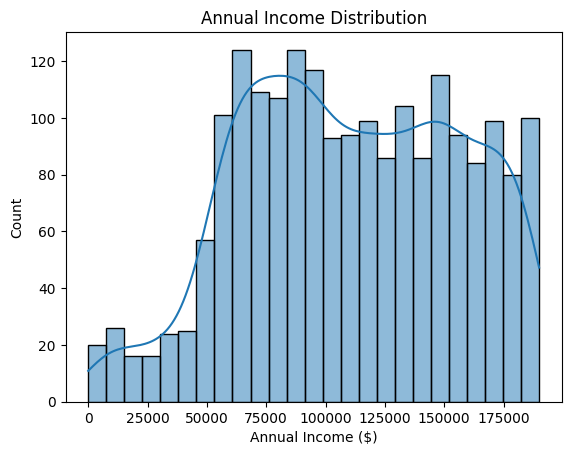

In [20]:
sns.histplot(data['Annual Income ($)'], kde=True, bins=25)
plt.title('Annual Income Distribution')
plt.show()

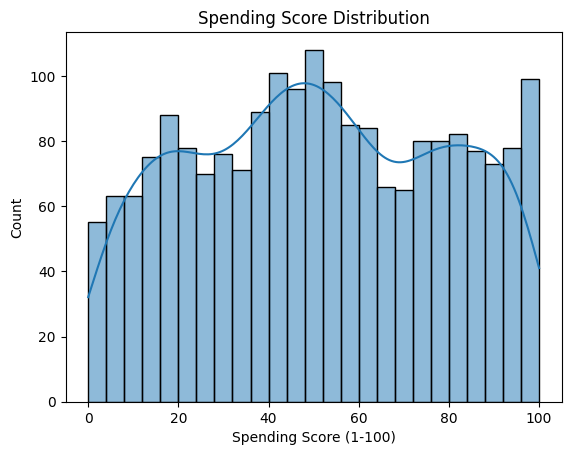

In [21]:
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=25)
plt.title('Spending Score Distribution')
plt.show()

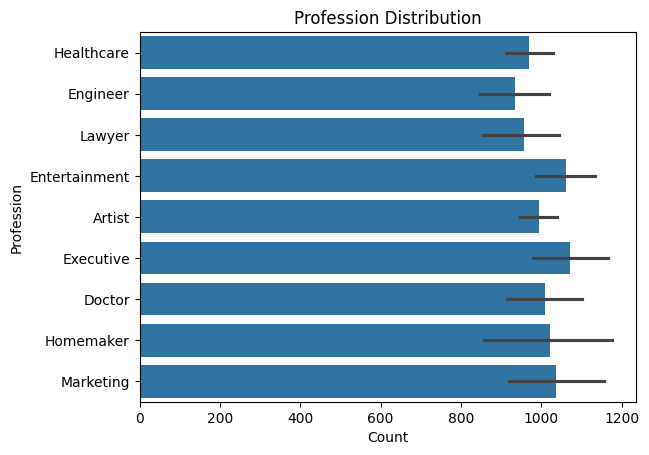

In [22]:
sns.barplot(x=data['Profession'].index, y=data['Profession'].values)
plt.title('Profession Distribution')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()

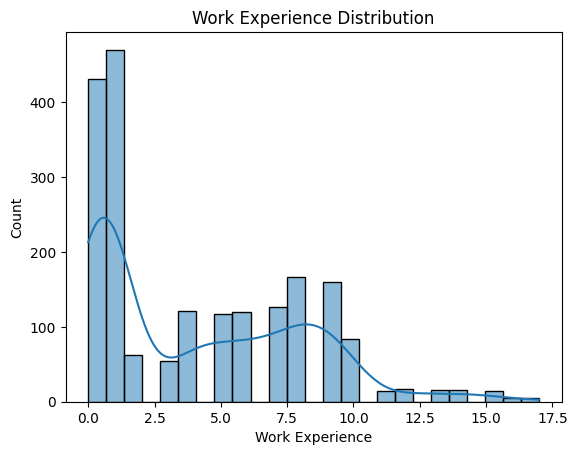

In [23]:
sns.histplot(data['Work Experience'], kde=True, bins=25)
plt.title('Work Experience Distribution')
plt.show()

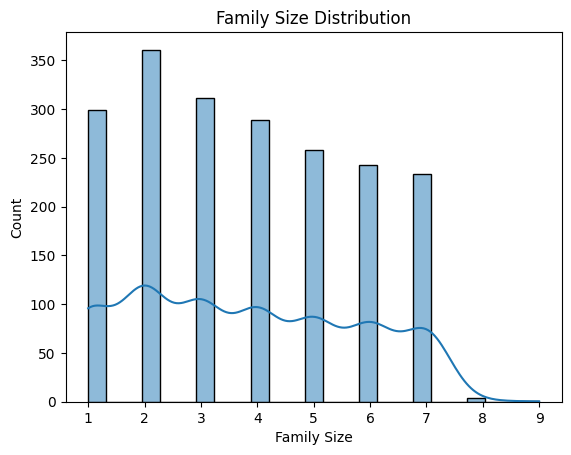

In [24]:
sns.histplot(data['Family Size'], kde=True, bins=25)
plt.title('Family Size Distribution')
plt.show()

Label encoding is done to convert categorical columns to numerical columns

In [25]:
from sklearn.preprocessing import LabelEncoder
###(assigns a unique integer to each category in the data, making it suitable for machine learning models that work with numerical inputs.)
label_encoder = LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])
data['Profession']=label_encoder.fit_transform(data['Profession'])
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7
1996,1997,0,91,73158,32,1,7,7
1997,1998,1,87,90961,14,5,9,2
1998,1999,1,77,182109,4,4,7,2


##### Use a scaler (e.g., StandardScaler or MinMaxScaler from sklearn) to ensure  all features are on the same scale.

In [26]:
from sklearn.preprocessing import StandardScaler
features = [ 'Annual Income ($)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])
scaled_data

array([[-2.09350095, -0.42833854],
       [-1.65613312,  1.07554599],
       [-0.54084515, -1.6099621 ],
       ...,
       [-0.43235606, -1.3235079 ],
       [ 1.56090408, -1.68157565],
       [-0.00266404,  0.03714953]])

3. Clustering
 ● Determine the optimal number of clusters:
 ○ UsetheElbow Method:
 ■ Plot the Within-Cluster Sum of Squares (WCSS) against the number of
 clusters.
 ■ The"elbow point" indicates the optimal number of clusters

### K means clustering

In [27]:
from sklearn.cluster import KMeans

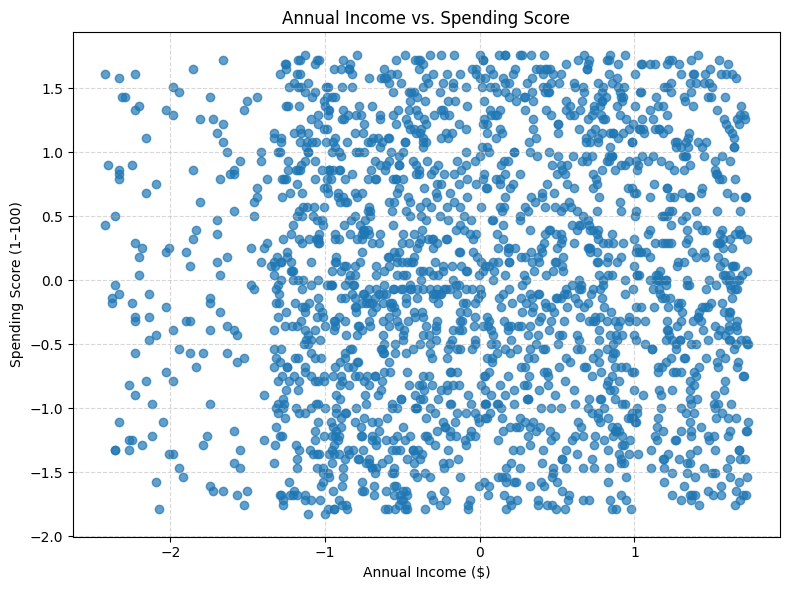

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], alpha=0.7)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1–100)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### There are too many clusters formed. so we can use elbow point graph to determine the number of clusters.

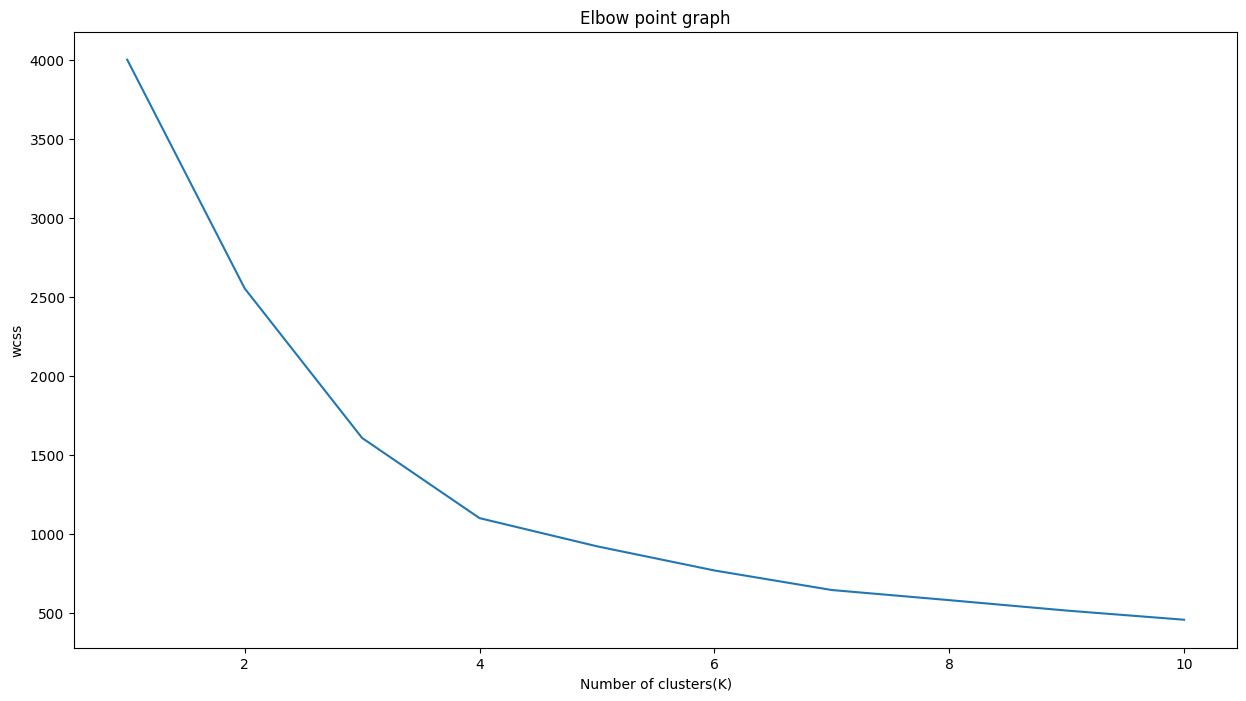

In [29]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=2)
    kmeans.fit(scaled_data[:, [0, 1]])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.title("Elbow point graph")
plt.xlabel("Number of clusters(K)")
plt.ylabel("wcss")
plt.show()

In [30]:
wcss

[3999.999999999999,
 2553.262589170263,
 1606.9205353004645,
 1099.6995138850189,
 921.5552258550628,
 768.6251934058777,
 644.8248355800872,
 580.7927464788628,
 514.769976272467,
 456.89691496994243]

### From the above plot, value of  K doesnot decrease after K=5 which is the elbow point.

Apply K-Means Clustering:
 ○ Use the optimal number of clusters identified from the Elbow Method.
 ○ Assign a cluster label to each customer.

In [31]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)
Y=kmeans.fit_predict(scaled_data[:, [0, 1]])


In [32]:
kmeans.cluster_centers_

array([[-0.97268154, -1.07117765],
       [-0.9645815 ,  0.9529871 ],
       [ 0.86671683,  1.0259352 ],
       [-0.17093164, -0.12368585],
       [ 1.03444427, -0.83778484]])

In [33]:
data['cluster']=Y
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,cluster
0,1,1,19,15000,39,5,1,4,0
1,2,1,21,35000,81,2,3,3,1
2,3,0,20,86000,6,2,1,1,0
3,4,0,23,59000,77,7,0,2,1
4,5,0,31,38000,40,3,2,6,0
...,...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7,4
1996,1997,0,91,73158,32,1,7,7,0
1997,1998,1,87,90961,14,5,9,2,0
1998,1999,1,77,182109,4,4,7,2,4


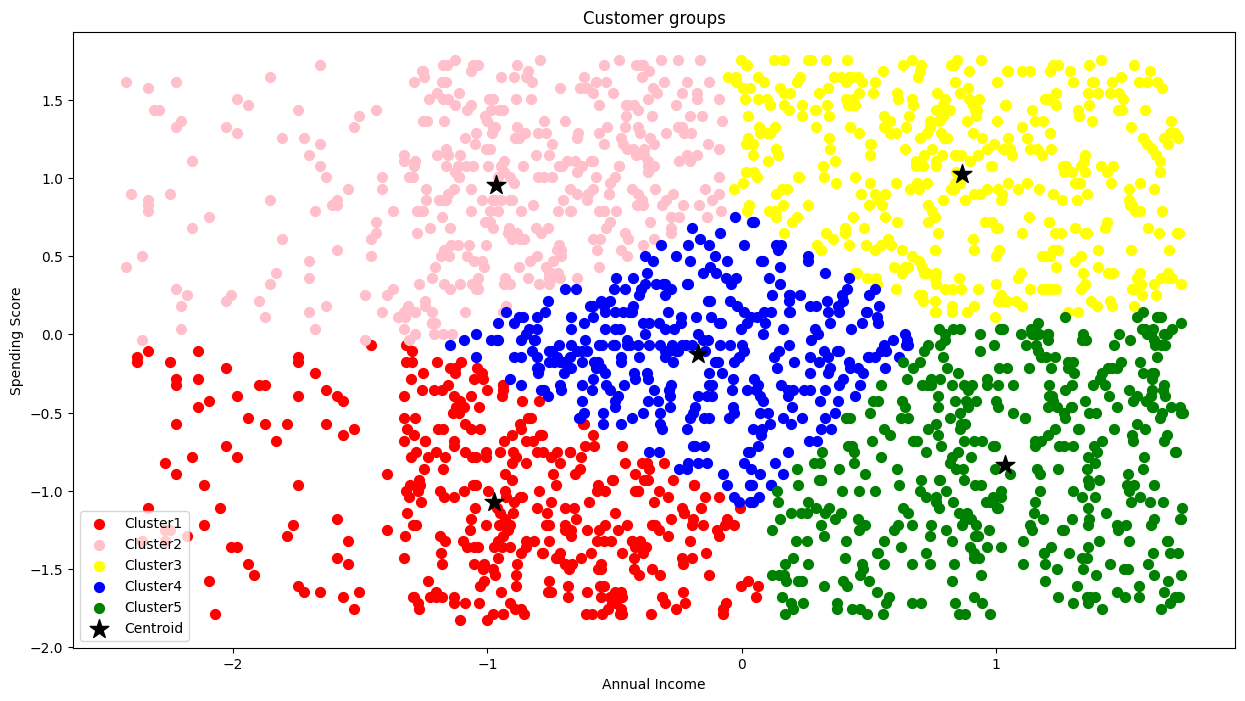

In [34]:
X = scaled_data[:, [0, 1]]
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='green', label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', marker='*', label='Centroid')
plt.title("Customer groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


Cluster1-Belongs to the people whose annual income is very low, so the spending score is proportionally low. They  belongs to poor people category.
Cluster2-Includes people who is having low income but they spends too much.
Cluster3-People having high income and high spending ratio. Wecan suggest these people to buy premium products and promotions.
Cluster4-People with an average annual inmcoem and average spending score. They are like middle class category customers who are budget friendly 
Cluster5-People with high annual income and low spending score. They spend much less even though their income is higher than others.Suggest credit card facilities or EMI payment for those group of customers. 

### Silhouette score for evaluation. We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [35]:
from sklearn.metrics import silhouette_score
s= []
k_rng=range(2,11)
for k in k_rng:
    kmeans=KMeans(n_clusters=k)
    km_pred=kmeans.fit_predict(scaled_data[:, [0, 1]])
    s.append(silhouette_score(scaled_data[:, [0, 1]], km_pred))

s

[0.34441248173970235,
 0.37411532753046484,
 0.3821965806279134,
 0.37077354835795084,
 0.3627712175130393,
 0.35132041974322736,
 0.35932778385476966,
 0.35581872551715016,
 0.36440437382569957]

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

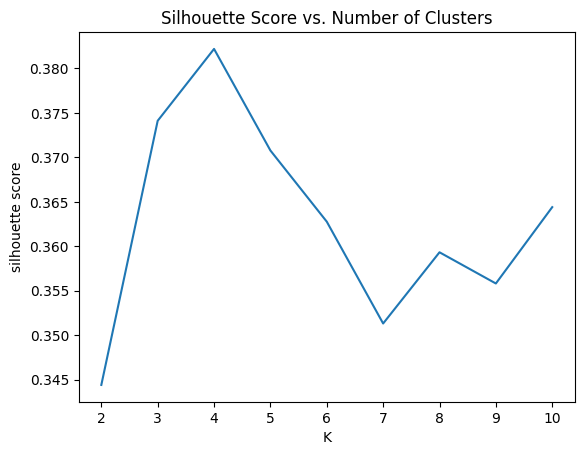

In [36]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')

#### Based on the above graph number of clusters corresponding to highest silhouette score is 4.

#### Highest Silhouette Score: Look for the value of k (number of clusters) that corresponds to the highest silhouette score on the plot. This value indicates the optimal number of clusters according to the silhouette score metric.

#### Overall Trend: Evaluate the overall trend of the silhouette scores as k increases. Typically, silhouette scores closer to 1 indicate better clustering, while scores closer to 0 or negative values suggest overlapping or poorly defined clusterd.

4. Visualization
 ● Create visualizations to represent the clusters:
 ○ 2DScatter Plot:
 ■ UsePCA(Principal Component Analysis) or t-SNE to reduce
 dimensions to two for visualization

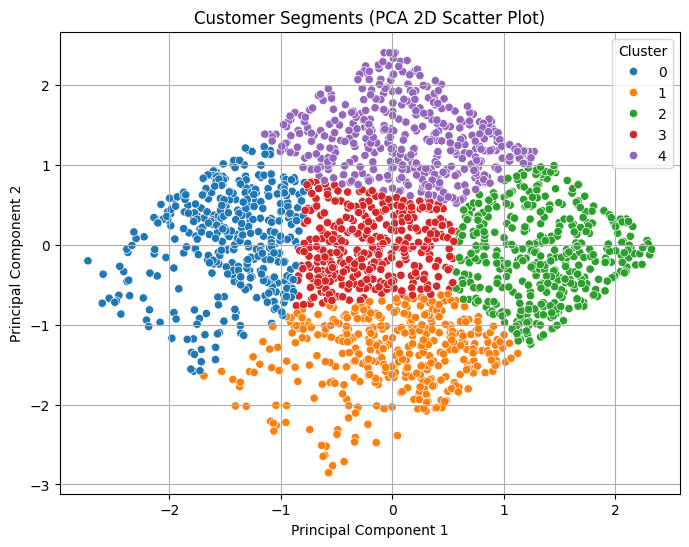

In [37]:
from sklearn.decomposition import PCA
# 
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data[:, [0, 1]])

# Add PCA components to DataFrame for plotting
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Plot the 2D scatter plot with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data, palette='tab10')
plt.title('Customer Segments (PCA 2D Scatter Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### PairPlots: Visualize relationships between features within clusters.

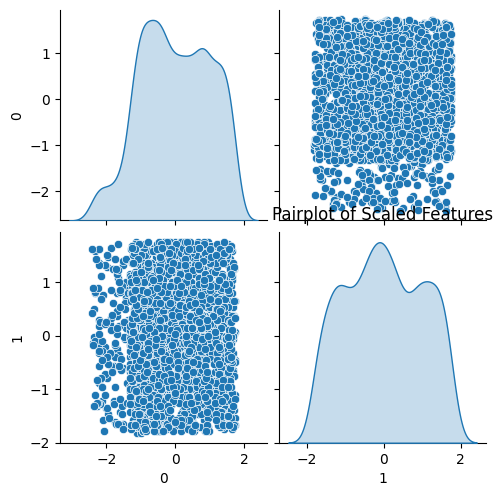

In [39]:
# Pair Plot for Detailed Pairwise Relationships
scaled_df = pd.DataFrame(scaled_data[:, [0,1]])
sns.pairplot(scaled_df, palette='tab10', diag_kind='kde')
plt.title("Pairplot of Scaled Features", y=1.02)
plt.show()

#### From the pair plot we can infer that, people having higher annual income are having high spending score.Annual income and spending score are highly correlated. 